In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Final Setup

In [17]:
n = 3*(64**3)
dm = 1./n
eta = 1.2 

In [18]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/11.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()

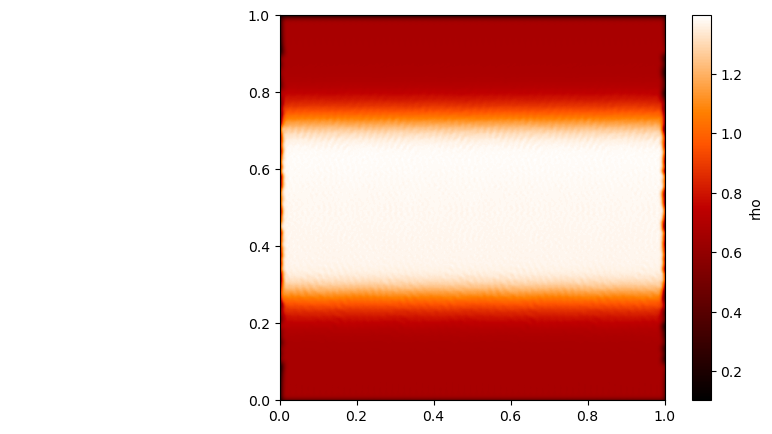

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0], xlim=[0, 1], ylim=[0, 1])
ax.set_xticks(np.linspace(0, 1, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.text(-0.7, 0.7, r"$t=1.0$", color="w")
ax.set_xlim(0., 1.)
plt.savefig("Kelvin_Helmholtz.png", dpi=300, transparent=True)
plt.show()

# Final Setup

In [20]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/11.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()

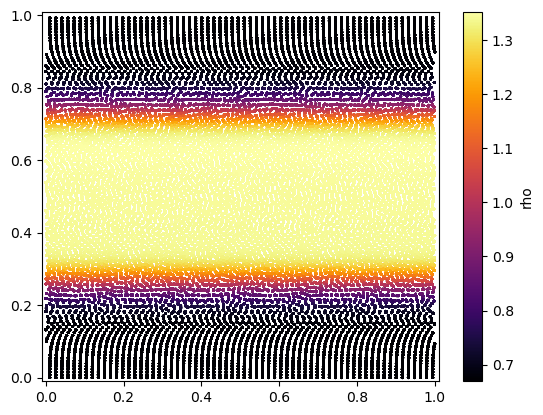

In [21]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=1)
plt.colorbar(label="rho")
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.savefig("Kelvin_Helmholtz_Part.png", dpi=300, transparent=True)
plt.show()

# Conservation's Laws

In [7]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

# Energy
def energy(vx, vy, vz, u):
    return 0.5*(vx*vx + vy*vy + vz*vz) + u

In [8]:
T = 52
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['vz'], df['u']))

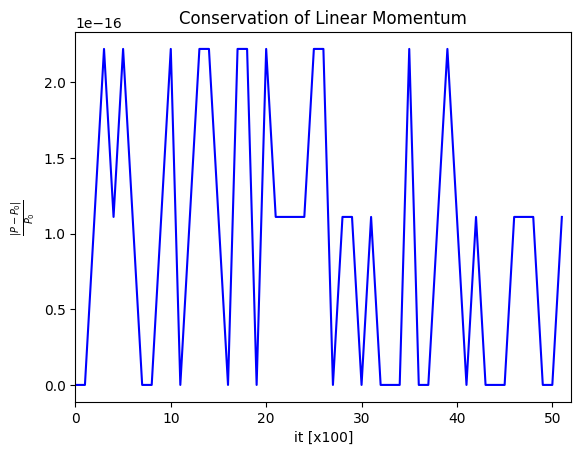

In [9]:
plt.plot(time[:], np.abs((lin_mom[:]-lin_mom[0])/lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{P_0}$")
plt.xlim(0, T)
plt.show()

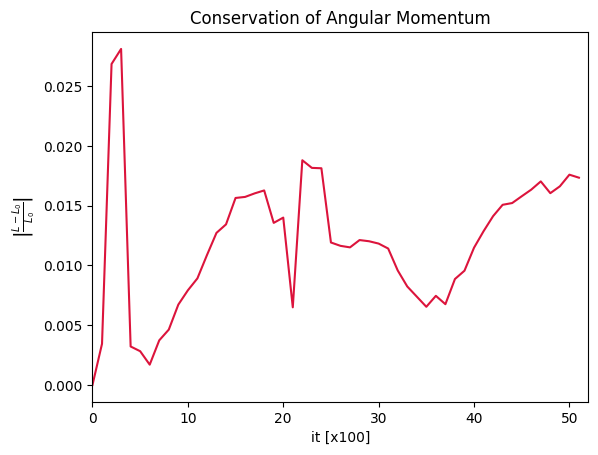

In [10]:
plt.plot(time[:], np.abs((ang_mom[:]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T)
plt.show()

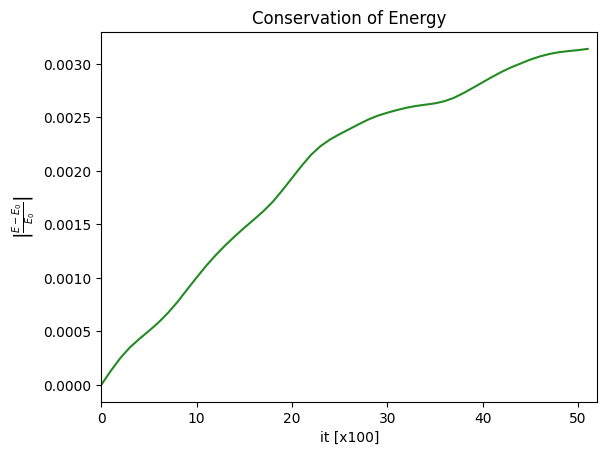

In [11]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()